In [ ]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras.preprocessing import image
# # from keras.preprocessing.image import ImageDataGenerator

import numpy as np
import pickle as pkl
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.layers import GlobalMaxPool2D
from sklearn.neighbors import NearestNeighbors
import os
from numpy.linalg import norm
from PIL import Image as PILImage, ImageTk
import tkinter as tk
import cv2


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile
import os

# Define paths
zip_path = '/content/drive/MyDrive/ecommerce.zip'
extract_path = '/content/drive/MyDrive/ecommerce/'

# Check if the ZIP file exists before proceeding
if not os.path.exists(zip_path):
    raise FileNotFoundError(f"ZIP file not found: {zip_path}")

# Open and extract the zip file
with zipfile.ZipFile(zip_path, 'r') as images:
    images.extractall(extract_path)

# Retrieve all file paths (including subdirectories)
filenames = []
for root, _, files in os.walk(extract_path):
    for file in files:
        filenames.append(os.path.join(root, file))

# Print the first 10 file paths
print(filenames[:10])

['/content/drive/MyDrive/ecommerce/ecommerce/10000.jpg', '/content/drive/MyDrive/ecommerce/ecommerce/10001.jpg', '/content/drive/MyDrive/ecommerce/ecommerce/10002.jpg', '/content/drive/MyDrive/ecommerce/ecommerce/10003.jpg', '/content/drive/MyDrive/ecommerce/ecommerce/10004.jpg', '/content/drive/MyDrive/ecommerce/ecommerce/10005.jpg', '/content/drive/MyDrive/ecommerce/ecommerce/10006.jpg', '/content/drive/MyDrive/ecommerce/ecommerce/10007.jpg', '/content/drive/MyDrive/ecommerce/ecommerce/10008.jpg', '/content/drive/MyDrive/ecommerce/ecommerce/10009.jpg']


In [ ]:
model = ResNet50(weights='imagenet', include_top=False,
                 input_shape=(224, 224, 3))
model.trainable = False
model = tf.keras.models.Sequential([model, GlobalMaxPool2D()])

model.summary()

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resnet50 (Functional)                │ (None, 7, 7, 2048)          │      23,587,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling2d                 │ (None, 2048)                │               0 │
│ (GlobalMaxPooling2D)                 │                             │                 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,587,712 (89.98 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
def extract_features_from_images(image_path, model):
    """Extract features from a single image using a pre-trained model."""
    # Load the image with the target size of 224x224
    img = image.load_img(image_path, target_size=(224, 224))

    # Convert the image to a numpy array
    img_array = image.img_to_array(img)

    # Expand dimensions to match the model's input shape (batch size of 1)
    img_expand_dim = np.expand_dims(img_array, axis=0)

    # Preprocess the image for the model
    img_preprocess = preprocess_input(img_expand_dim)

    # Predict features using the model and flatten the result
    result = model.predict(img_preprocess).flatten()

    # Normalize the result vector
    norm_result = result / norm(result)

    return norm_result

In [ ]:
# Extract features from all images
image_features = []
for file in filenames:
    image_features.append(extract_features_from_images(file, model))

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━

In [ ]:
pkl.dump(image_features, open('Images_features.pkl', 'wb'))
pkl.dump(filenames, open('filenames.pkl', 'wb'))

In [ ]:
n_neighbors = min(5, len(image_features))
neighbors = NearestNeighbors(
    n_neighbors=n_neighbors, algorithm='brute', metric='euclidean')
neighbors.fit(image_features)


NearestNeighbors(algorithm='brute', metric='euclidean')

In [ ]:
# Example: Extract features from a single input image and find nearest neighbors
input_image = extract_features_from_images('/content/drive/MyDrive/ecommerce/ecommerce/10003.jpg', model)
distance, indices = neighbors.kneighbors([input_image])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step


In [ ]:
import matplotlib.pyplot as plt

def display_recommendations(input_image_path, indices, filenames):
    """
    Displays the input image alongside its recommended similar images.

    Parameters:
    input_image_path (str): Path to the input image.
    indices (list): List of indices of recommended images.
    filenames (list): List of all image file paths.
    """
    # Load and display the input image
    input_img = PILImage.open(input_image_path)

    # Retrieve recommended images
    recommended_images = [filenames[i] for i in indices[0]]

    # Plot images
    plt.figure(figsize=(12, 6))

    # Show input image
    plt.subplot(1, len(recommended_images) + 1, 1)
    plt.imshow(input_img)
    plt.axis('off')
    plt.title("Input Image")

    # Show recommended images
    for i, img_path in enumerate(recommended_images):
        img = PILImage.open(img_path)
        plt.subplot(1, len(recommended_images) + 1, i + 2)
        plt.imshow(img)
        plt.axis('off')
        plt.title(f"Recommendation {i+1}")

    plt.show()

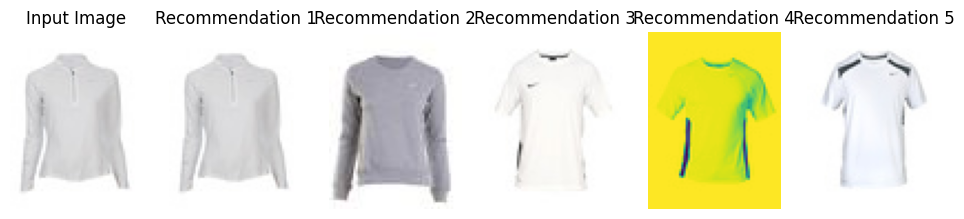

In [ ]:
# Example Usage
display_recommendations('/content/drive/MyDrive/ecommerce/ecommerce/10003.jpg', indices, filenames)